 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [4]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

# talk about and add attributes you think would make sense inside of a video class

# create some class methods to interact with those attributes and change them when necessary

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
        


cool video
What would you like to rename your video too?summer of '97
summer of '97


In [ ]:
class Video():
    def __init__(self):
                
        self.title = None
       
        #action methods
        self.rewind = ''
        self.fast_forward = ''
        self.pause = ''
        self.play = ''     
        self.play_previous = ''
        self.skip_intro = ''
        self.download = ''
        
        #settings method
        self.language = ''
        self.play_speed = ''
        self.captions = ''
        self.volume = ''
        
        #display methods
        self.display_info = ''
        self.length = timedelta()
        self.current_time = ''
        self.link = generic_image       
        
        
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def rewind(self):
        if self.current_time >= 10:
            self.current_time -= 10
    
    def fast_forward(self):
        if self.current_time != self.length:
            self.current_time += 10
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
    
    def action(self):
        #while loop for each action
        
    
    
    
    
        

Now playing None


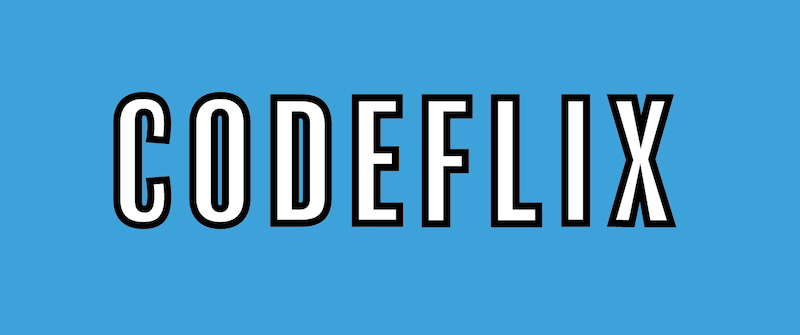

In [8]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
    
my_video = Video()

my_video.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [18]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        if data['runtime']:
            self.length = timedelta(minutes = data['runtime'])
        else:
            self.length = timedelta(minutes=30)
        if data ['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [29]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = []
        self.episodes = []
    
    def get_info(self, query = ''):
        data = None #<-- in case we can't find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ''
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                    
            # Use data to build our attributes
            self.id = data['id']
            self.title = data['name']
            self.genres = [genre for genre in data['genres']] #<-- list comprehension adds each genre to a list
            if data['network']:
                self.network = data['network']['name']
            else:
                self.network = data['webChannel']['name']
                
            #Api call for episodes
            r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
            if r.status_code == 200:
                episodes = r.json()
            else:
                print(f"Episode Error: Status code {r.status_code}")
            
            # ^ setting attributes from show api call
            #---------------------------------------------------------------------------  
            # v setting attributes from the episode api call
            self.seasons = episodes[-1]['season']
            self.episodes = [Episode(ep) for ep in episodes]
            print(f"{self.title} has {len(self.episodes)} episodes.")
            
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? Also, get a job. y/n ").lower().strip()
                if watching not in ('yes', 'y', 'yeah', 'affirmative', 'aye aye captain'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
                
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
                
                    
                    
                    

In [30]:
first_show = Series()
first_show.get_info()

What is the name of the series? ted lasso
Ted Lasso has 34 episodes.


Now playing Pilot


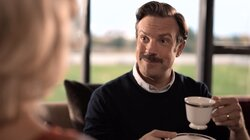

Now playing Biscuits


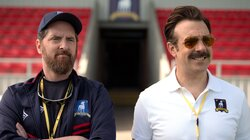

Now playing Trent Crimm: The Independent


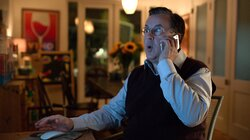

KeyboardInterrupt: Interrupted by user

In [31]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [4]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]
    
# class User:
#     id_counter = 1
#     def __init__(self, username, password):
#         self.username = username
#         self.password = password[::-2]
#         self.id = User.id_counter
#         User.id_counter += 1
#         self.watch_list = []
        
#     def __str__(self):
#         formatted_user = f"""
#         {self.id} - {self.username.title()}
#         pw: {self.password}            
#         """
#         return formatted_user
    
#     def __repr__(self):
#         return f"<User {self.id} | {self.username}>"
    
#     def check_password(self, password_guess):
#         return self.password == password_guess[::-2]

In [5]:
# from datetime import timedelta, date
# from IPython.display import Image
# # import requests
# from time import sleep

# generic_image = 'codeflix.png'

# class Theater():
#     def __init__(self):
#         self.users = set()
#         self.current_user = None
        
#     # add a user
#     def add_user(self):
#         username = input("Please enter a username: ")
        
#         if username in {u.username for u in self.users}:
#             print("User with that name already exists. Please try again!")
#         else:
#             password = input("Please enter your password. ")
#             user = User(username, password)
#             self.users.add(user)
#             print(f"{user} has been created!!!")
            
#         self.login_user()
            
#     #choose a user
#     def login_user(self):
#         username = input("What is your username? ")
#         password = input("What is your password? ")

#         for user in self.users:
#             if user.username == username and user.check_password(password):
#                 self.current_user = user
#                 print(f"{user} has logged in")
#                 break
#         else:
#             print("Username and/or password is incorrect")
            
#     def logout(self):
#         self.current_user = None
#         print("You have succesfully been logged out!")
        
#     def update_user(self):
        
#         if self.current_user:
#             print(self.current_user)
#             new_user = input("Please enter the updated username or enter skip to keep your current username")
#             if new_user.lower() != 'skip':
#                 self.current_user.username = new_user
#             new_pw = input("Please enter the updated password or enter skip to keep current password")
#             if new_pw.lower() != 'skip':
#                 self.current_user.password = new_pw
#             print(f"{self.current_user.username}'s info has been updated")
            
#         else:
#             print('please login to update user')
#             self.login_user()
         
    
#     #add to watchlist
#     def add_to_watchlist(self, query = ''):
#         show = Series()
#         show.get_info(query)
        
#         self.current_user.watch_list.append(show)
        
#         print(f"{show.title} has been added to the watchlist! ")
        
#     #view watchlist
#     def view_watch_list(self):
#         for series in self.current_user.watch_list:
#             print(f"\n\n{series} | Episodes: {len(series)}")
#             print(f"\nSummary: \n {series.summary}")
#             display(Image(series.episodes[0].link))
            
#     def delete(self):
#         print("Your current watchlist: ")
#         self.view_watch_list()
        
#         response = input("What would you like to remove from your watchlist? ")
        
#         for series in self.current_user.watch_list:
#             if series.title.title() == response.title():
#                 self.current_user.watch_list.remove(series)
#                 print(f"{response.title()} has been removed from your watch list! ")
#                 break
#         else:
#             print("That title is not in your watchlist!")
                
#         self.view_watch_list()
        
#     #choose from watchlist
#     def choose_from_watch_list(self):
#         self.view_watch_list()
        
#         watch = input("What would you like to watch? ")
# #         if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
#         for series in self.current_user.watch_list:
#             if series.title.lower() == watch.lower().strip():
#                 print("..................")
#                 sleep(2)
#                 print("..................")
#                 series.watch()
        
#         else:
#             response = input(f"{watch} is not in your watchlist...would you like to add it y/n>")
#             if response in ('yes', 'y'):
#                 self.add_to_watchlist(watch)                
#                 print("..................")
#                 sleep(2)
#                 print("..................")
#                 self.current_user.watch_list[-1].watch()    
            

            
#     # run function that gives us that sweet, sweet sauce...or spicy if that's your preference or both
#     def run(self):
#         """
#         Method that allows users to choose a series and play episodes and other cool stuff too!
#         """
#         display(Image(generic_image))
        
#         if self.users:
#             self.login_user()
#         else:
#             self.add_user()
        
#         print("""
#         Options:
#         Add - add a new user
#         Login - login to your profile
#         Update - update user info
#         Logout - logout of your profile
#         Search - search for shows
#         Watch - pick something from your watchlist
#         View - view watchlist
#         Delete - delete from watchlist
#         Quit - close the application
#         """)
        
#         while True:
#             response = input("What would you like to do? (add, update, login, logout, search, watch, view ,delete, quit) ").lower()
            
#             if response == 'search':
#                 self.add_to_watchlist()
#             elif response == "watch":
#                 self.choose_from_watch_list()
#             elif response == 'add':
#                 self.add_user()
#             elif response == 'logout':
#                 self.logout()
#                 new_response = input("What would you like to do next?").lower()
#                 if new_response == 'add':
#                     self.add_user()
#                 elif new_response == 'login':
#                     self.login_user()
#                 elif new_response == 'quit':
#                     print("Thanks for watching!")
#                     break                    
#             elif response == 'login':
#                 self.login_user()
#             elif response == 'update':
#                 self.update_user()
#             elif response == 'view':
#                 self.view_watch_list()
#             elif response == 'delete':
#                 self.delete()
#             elif response == 'quit':
#                 print(f"Thanks for watching, {self.current_user}! Have a nice day!")
#                 break
                
#             else:
#                 print("Invalid Input: please choose from the list!")
###########^^^^^^^^^^^^^^^^^ MY TYPED CODE ^^^^^^^###################vvvvvvvvvvvvvvvvvv RYAN 'S CODE vvvvvvvvv###########################################################                
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # add a user
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!")
        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
        
        
    #choose a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in")
                break
                
        else:
            print("Username and/or password is incorrect!")
            
    def logout(self):
        self.current_user = None
        print("You have succesfully logged out!")
        
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username...")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to skip...")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
                  
        else:
            print("Please login to update user info")
            self.login_user()
            
            
    #creating and using watchlist which is an attribute of the User class
    def add_to_watchlist(self, query=''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
        
    #view watchlist
    def view_watch_list(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
    def delete(self):
        print("Your current watchlist: ")
        self.view_watch_list()
        
        response = input("What would you like to remove from your watchlist? ")
        
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watch list! ")
                break
                
        else:
            print("That title is not in your watchlist!")
        
        self.view_watch_list()
        
        
    #choose from watchlist
    def choose_from_watch_list(self):
        self.view_watch_list()
        
        watch = input("What would you like to watch? ")
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
        for series in self.current_user.watch_list:
            if series.title.lower() == watch.lower().strip():
                print("............")
                sleep(2)
                print("............")
                series.watch()
                break
                
        else:
            response = input(f"{watch} is not in your watchlist...would you like to add it y/n>")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)
                
                print(".............")
                sleep(2)
                print(".............")
                self.current_user.watch_list[-1].watch()
                
                
                
    # run function that gives us that sweet, sweet sauce...or spicy if thats your preference or both
    def run(self):
        """
        Method that allows users to choose a series and play episodes and other cool stuff too!
        """
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
        print("""
        Options:
        Add - add a new user
        Login - login to your profile 
        Update - update user info
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        """)
        
        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)").lower()
            
            if response== 'search':
                self.add_to_watchlist()
                
            elif response == "watch":
                self.choose_from_watch_list()
                
            elif response == 'add':
                self.add_user()
            elif response == 'logout':
                self.logout()
                new_response = input("What would you like to do next? add/login/quit").lower()
                if new_response == 'add':
                    self.add_user()
                elif new_response == 'login':
                    self.login_user()
                elif new_response == 'quit':
                    print("Thanks for watching!")
                    break
                    
            elif response == 'login':
                self.login_user()
                
            elif response == 'update':
                self.update_user()
                
            elif response == 'view':
                self.view_watch_list()
            elif response == "delete":
                self.delete()
            elif response == "quit":
                print(f"Thanks for watching, {self.current_user}! Have a nice day!")
                break
                
            else:
                print("Invalid Input: please choose from the list!")
        

In [6]:
codeflix = Theater()

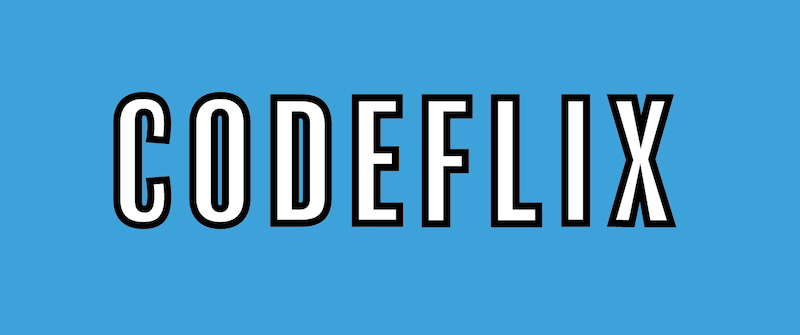

In [ ]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [ ]:
"""
Find Lists of Shows by Different Searching Different Criteria:
    - rating https://api.tvmaze.com/shows
    - genres
    - network name
    
query = input("What is the name of the series? ")
r = requests.get(f'https://api.tvmaze.com/shows')
if r.status_code == 200:
    data = r.json()

genres = {}
rating = {}
network = {}

loop through the data to create one dictionary or three dictionaries which have the name of the show w/ rating,
genre(s), and network name - that can be retrieved more easily with condition statements.

create a search method in the Theatre class
                
"""